In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("placement_data.csv")
df

,Name,CGPA,IQ,Placement
0,Vivaan Sharma,7.50,115,True
1,Arjun Patel,6.86,118,True
2,Vihaan Reddy,7.65,126,True
3,Vivaan Kapoor,8.52,125,True
4,Vivaan Malhotra,6.77,89,False
...,...,...,...,...
195,Sai Sharma,7.39,102,True
196,Sai Patel,6.12,84,False
197,Vihaan Verma,7.15,130,True
198,Sai Kapoor,7.06,108,True


In [16]:
# Steps 

# 0. Preprocessing + EDA + Feature Selection
# 1. Extract input and output columns
# 2. Scale the Values
# 3. Train Test Split
# 4. Train the Model
# 5. Evaluate the Model / Model Selection
# 6. Deploy the Model

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       200 non-null    object 
 1   CGPA       200 non-null    float64
 2   IQ         200 non-null    int64  
 3   Placement  200 non-null    bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 5.0+ KB


In [18]:
# Preprocessing

df = df.iloc[:,1:4] # remove Name column
df

,CGPA,IQ,Placement
0,7.50,115,True
1,6.86,118,True
2,7.65,126,True
3,8.52,125,True
4,6.77,89,False
...,...,...,...
195,7.39,102,True
196,6.12,84,False
197,7.15,130,True
198,7.06,108,True


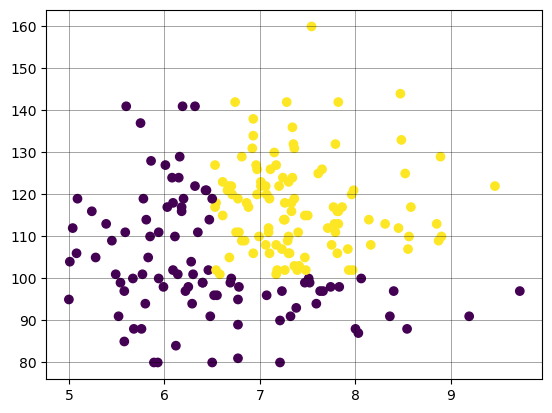

In [19]:
# EDA

x = df["CGPA"]
y = df["IQ"]

plt.scatter(x,y,c=df["Placement"])
plt.grid(color = "Black",alpha = 0.5,lw = 0.5)

# in graph Purple color = Placement = False and Yellow color = Placement = False

In [20]:
# Extract input and output columns

a = df.iloc[:,0:2] # independent variables
b = df.iloc[:,2:3] # dependent variable

In [21]:
# Train Test Split

from sklearn.model_selection import train_test_split

a_train,a_test,b_train,b_test=train_test_split(a,b,test_size = 0.1) 
# train_test_split(independent variables, dependent variable, train_size = 0.1)
# train_size = 0.1 means 10% of the data will be used for training and the rest for testing

print("a_train.shape = ",a_train.shape)
print("a_test.shape = ",a_test.shape)
print("b_train.shape = ",b_train.shape)
print("b_test.shape = ",b_test.shape)


a_train.shape =  (180, 2)
a_test.shape =  (20, 2)
b_train.shape =  (180, 1)
b_test.shape =  (20, 1)


In [22]:
# Scale the Values

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

a_train = scaler.fit_transform(a_train)
a_test = scaler.transform(a_test)

In [23]:
# Train the Model

from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV()

clf.fit(a_train,b_train) # Model Training


/home/yash/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

In [24]:
# Evaluate the Model

b_pred = clf.predict(a_test) # predicting the output for test data

from sklearn.metrics import accuracy_score

accuracy_score(b_test,b_pred) # calculating the accuracy of the model

0.95

<Axes: >

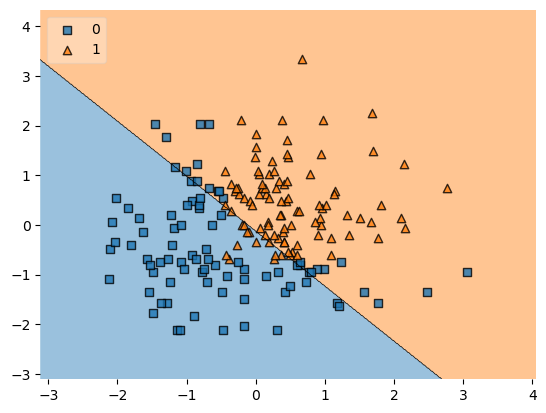

In [25]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(a_train, b_train.values.ravel().astype(np.int_), clf=clf, legend=2)

In [26]:
import pickle

pickle.dump(clf, open("model.pkl", "wb")) # saving the model